In [ ]:
!pip install pycaret==3.0.4
!pip install pycaret[analysis]==3.0.4
!pip install shap==0.40.0
!pip install numpy==1.23.5

In [2]:
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from pycaret.classification import *
reg1 = setup(data, target = 'Class variable', session_id=1)

,Description,Value
0,Session id,1
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [4]:
best_model = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7803,0.8301,0.6205,0.7132,0.6609,0.5002,0.5048,0.6900
lda,Linear Discriminant Analysis,0.7803,0.8326,0.5993,0.7188,0.6507,0.4937,0.4996,0.0740
lr,Logistic Regression,0.7785,0.8335,0.5993,0.7142,0.6489,0.4901,0.4956,2.1940
ridge,Ridge Classifier,0.7785,0.0000,0.5940,0.7162,0.6460,0.4884,0.4946,0.1040
nb,Naive Bayes,0.7692,0.8208,0.6366,0.6790,0.6553,0.4825,0.4845,0.1260
et,Extra Trees Classifier,0.7598,0.8290,0.5835,0.6835,0.6234,0.4507,0.4571,0.2560
xgboost,Extreme Gradient Boosting,0.7561,0.8085,0.5940,0.6686,0.6244,0.4463,0.4508,0.1520
lightgbm,Light Gradient Boosting Machine,0.7524,0.8020,0.6101,0.6562,0.6296,0.4448,0.4472,0.1380
gbc,Gradient Boosting Classifier,0.7468,0.8141,0.5940,0.6510,0.6178,0.4300,0.4334,0.1580
knn,K Neighbors Classifier,0.7466,0.7725,0.5666,0.6662,0.6085,0.4236,0.4294,0.2000


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [5]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.8060,0.3684,0.7000,0.4828,0.3170,0.3476
1,0.7407,0.8015,0.4737,0.6923,0.5625,0.3874,0.4014
2,0.7037,0.8015,0.6316,0.5714,0.6000,0.3656,0.3668
3,0.7778,0.8556,0.6842,0.6842,0.6842,0.5128,0.5128
4,0.7593,0.7865,0.5789,0.6875,0.6286,0.4524,0.4561
5,0.7037,0.7564,0.5789,0.5789,0.5789,0.3504,0.3504
6,0.6667,0.7459,0.4211,0.5333,0.4706,0.2322,0.2357
7,0.8113,0.8254,0.7222,0.7222,0.7222,0.5794,0.5794
8,0.6981,0.7857,0.6111,0.5500,0.5789,0.3447,0.3458


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [6]:
tuned_lgbm = tune_model(lgbm, n_iter=3, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7037,0.8496,0.4211,0.6154,0.5000,0.2998,0.3107
1,0.7963,0.8180,0.6316,0.7500,0.6857,0.5367,0.5410
2,0.7963,0.8647,0.6842,0.7222,0.7027,0.5479,0.5484
3,0.7963,0.8511,0.7368,0.7000,0.7179,0.5587,0.5591
4,0.7778,0.8075,0.6316,0.7059,0.6667,0.5008,0.5025
5,0.7222,0.7774,0.5789,0.6111,0.5946,0.3836,0.3839
6,0.7037,0.7564,0.5263,0.5882,0.5556,0.3344,0.3355
7,0.7736,0.8619,0.6667,0.6667,0.6667,0.4952,0.4952
8,0.7547,0.7952,0.6667,0.6316,0.6486,0.4605,0.4609


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 3 candidates, totalling 30 fits


In [7]:
tuned_lgbm

LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=26, min_child_weight=0.001, min_split_gain=0.8,
               n_estimators=230, n_jobs=-1, num_leaves=100, objective=None,
               random_state=1, reg_alpha=0.005, reg_lambda=4, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

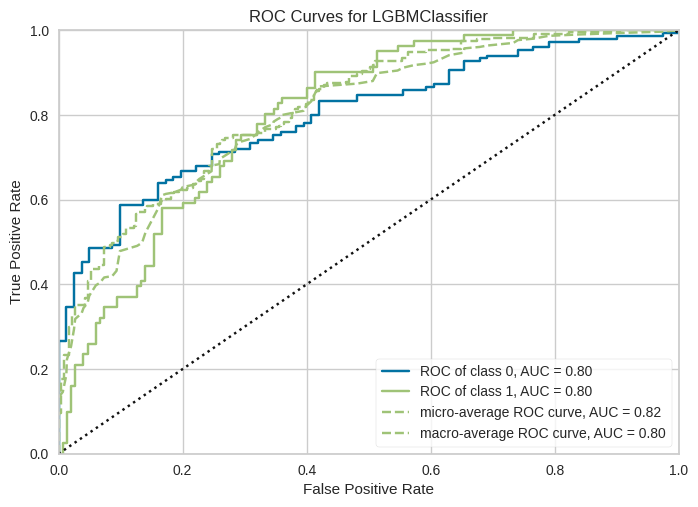

In [8]:
plot_model(tuned_lgbm)

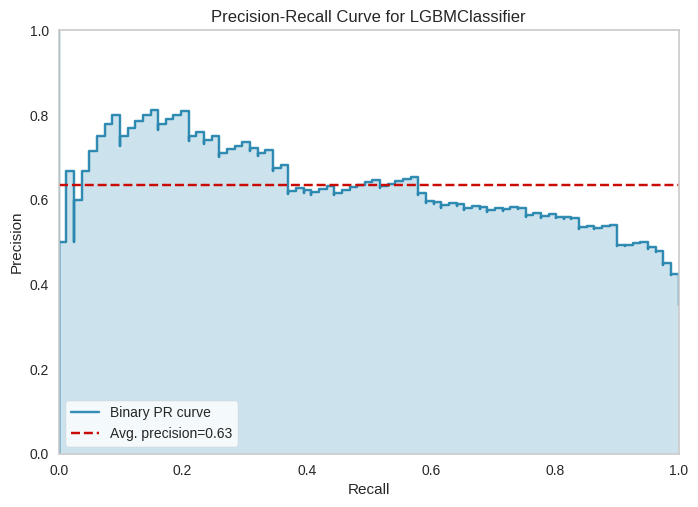

In [9]:
plot_model(tuned_lgbm, plot = 'pr')

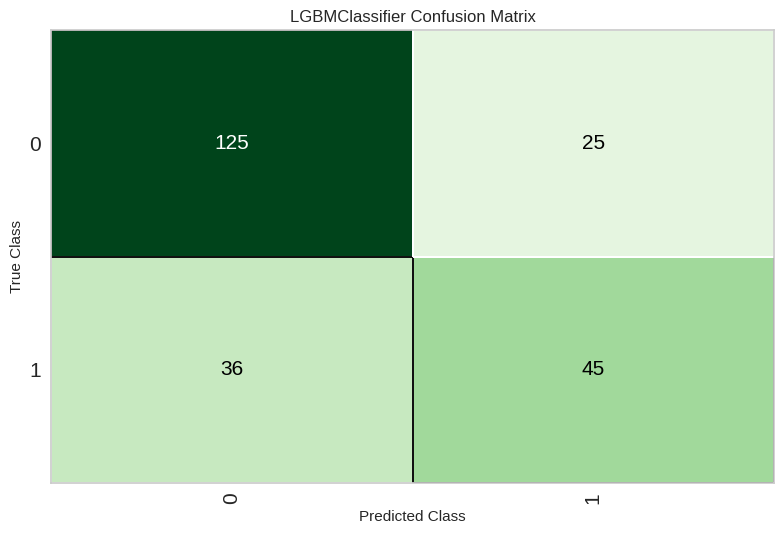

In [10]:
plot_model(tuned_lgbm, plot = 'confusion_matrix')

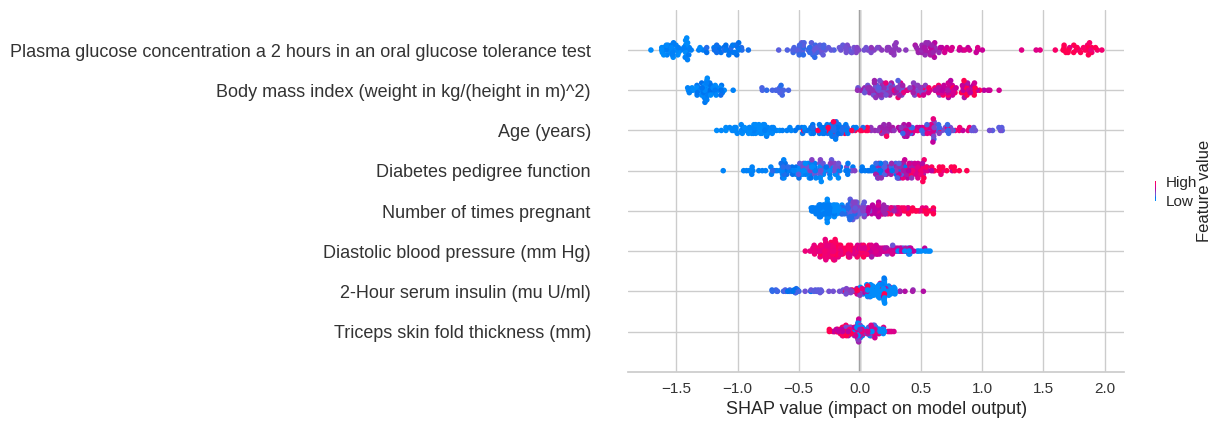

In [11]:
interpret_model(tuned_lgbm)

In [12]:
interpret_model(tuned_lgbm, plot = 'reason', observation = 1)